## Observations and Insights 

1. There is a correlation between the mouse's weight and the volume of its tumour suggesting that the heavier the mouse was, the larger their tumour.
2. From the boxplot, Capomulin and Ramicane treatments proved the most effective with the smallest average tumour size at the end of the treatment.
3. More timepoint data was collected for Capomulin and Ramicane suggesting that more mice survived longer under these treatments given all treatments had the same amount of mice at the start of each treatment, apart from Stelasyn which had one less subject (see bar chart for 'Number of Mice for Each Treatment) 

## Pymaceuticals

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check number of values
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
no_mice = combined_df['Mouse ID'].nunique()
print(no_mice)

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df['Duplicate Data'] = combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicated_mice = combined_df.loc[combined_df['Duplicate Data']== True, ['Mouse ID', 'Timepoint']]
duplicated_mice

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = combined_df.loc[combined_df['Duplicate Data'] == True]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate Data
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate Data
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [7]:
# Check the count after removing duplicates
clean_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Duplicate Data        1888
dtype: int64

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_no_mice = clean_df['Mouse ID'].nunique()
print(clean_no_mice)

249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

sum_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std,
    'SEM': sem
})
sum_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
agg_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

#### Total Counts for Each Treatment (Pandas)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

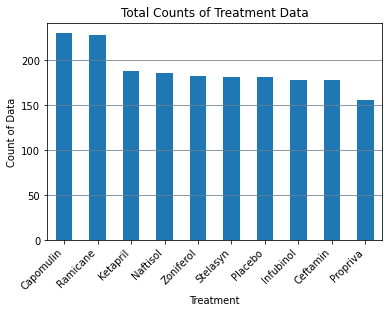

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_df = clean_df['Drug Regimen'].value_counts()
plot = treatment_df.plot(kind='bar', title='Total Counts of Treatment Data', rot=45)
plot.set(xlabel='Treatment', ylabel='Count of Data')
plt.grid(axis='y', color='slategray')
plt.xticks(ha = 'right')

#### Number of Mice for Each Treatment (Pandas)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

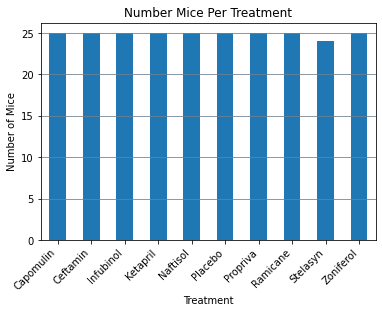

In [12]:
treatment_unique_df = clean_df.groupby('Drug Regimen')['Mouse ID'].nunique()
plot = treatment_unique_df.plot(kind='bar', x='Treatment', y='Count', title='Number Mice Per Treatment', rot=45)
plot.set(xlabel='Treatment', ylabel='Number of Mice')
plt.grid(axis='y', color='slategray')
plt.xticks(ha = 'right')

#### Total Counts for Each Treatment (Matplotlib)

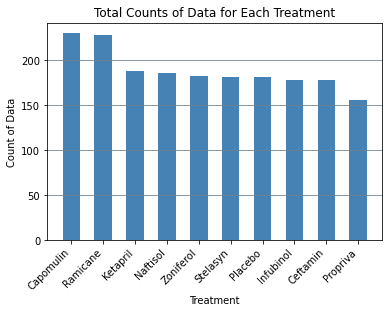

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt_df = treatment_df.reset_index()
x_axis = np.arange(len(plt_df))
tick_loc = [value for value in x_axis]

fig1, ax = plt.subplots()
ax.bar(x_axis, treatment_df, color='steelblue', width = .55)
ax.set(xlabel='Treatment', ylabel='Count of Data', title='Total Counts of Data for Each Treatment')
ax.grid(axis='y', color='slategray')
plt.xticks(tick_loc, plt_df['index'], rotation=45, ha='right')

plt.show()

#### Number of Mice for Each Treatment (Matplotlib)

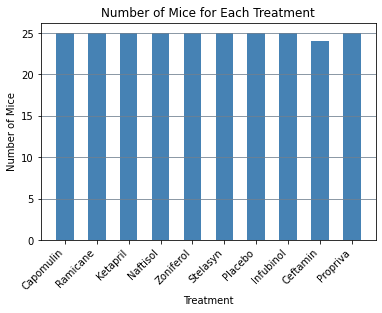

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(plt_df))
tick_loc = [value for value in x_axis]

fig2, ax = plt.subplots()
ax.bar(x_axis, treatment_unique_df, color='steelblue', width = .55)
ax.set(xlabel='Treatment', ylabel='Number of Mice', title='Number of Mice for Each Treatment')
ax.grid(axis='y', color='slategray')
plt.xticks(tick_loc, plt_df['index'], rotation=45, ha='right')

plt.show()

#### Gender Distribution of Total Data (Pandas)

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

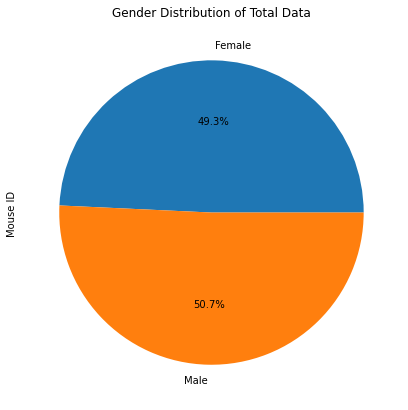

In [15]:
# Generate a pie plot showing the distribution of female versus male mice
# using pandas
gender_df = clean_df.groupby('Sex')['Mouse ID'].count()
gender_df.plot(kind='pie', autopct="%1.1f%%", figsize=(7,7))
plt.title('Gender Distribution of Total Data')
gender_df

#### Gender Distribution of Mice (Pandas)

Text(0.5, 1.0, 'Gender Distribution of Mice')

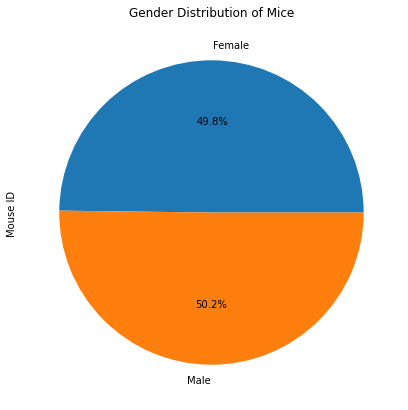

In [16]:
# Generate a pie plot showing the distribution of female versus male mice
# using pandas
unique_gender_df = clean_df.groupby('Sex')['Mouse ID'].nunique()
unique_gender_df.plot(kind='pie', autopct="%1.1f%%", figsize=(7,7))
plt.title('Gender Distribution of Mice')

#### Gender Distribution of Total Data (Matplotlib)

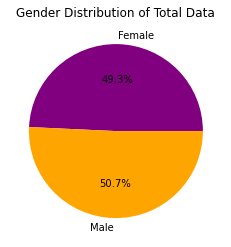

In [17]:
# Generate a pie plot showing the distribution of female versus male mice
# using pyplot
pie_df = gender_df.reset_index()
sex = pie_df['Sex']
count = pie_df['Mouse ID']
colors = ['purple', 'orange']
plt.pie(count, labels=sex, colors=colors, autopct="%1.1f%%")
plt.title('Gender Distribution of Total Data')
plt.show()

#### Gender Distribution of Mice (Matplotlib)

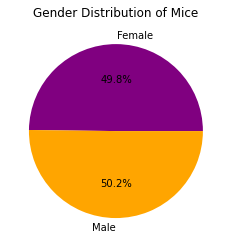

In [18]:
pie_df = unique_gender_df.reset_index()
sex = pie_df['Sex']
count = pie_df['Mouse ID'].unique()
colors = ['purple', 'orange']
plt.pie(count, labels=sex, colors=colors, autopct="%1.1f%%")
plt.title('Gender Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the 
# treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = clean_df[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
sorted_df = filtered_df.sort_values('Timepoint', ascending=False)
sorted_group_df = sorted_df.groupby(['Drug Regimen', 'Mouse ID']).first()
sorted_group_df

Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen Mouse ID                                              
Capomulin    b128      Female           9          22         45   
             b742        Male           7          21         45   
             f966        Male          16          17         20   
             g288        Male           3          19         45   
             g316      Female          22          22         45   
...                       ...         ...         ...        ...   
Ramicane     s508        Male           1          17         45   
             u196        Male          18          25         45   
             w678      Female           5          24          5   
             y449        Male          19          24         15   
             z578        Male          11          16         45   

                       Tumor Volume (mm3)  Metastatic Sites  Duplicate Data  
Drug Regimen Mouse ID                                                        
Capomulin    b128               38.982878                 2           False  
             b742               38.939633                 0           False  
             f966               30.485985                 0           False  
             g288               37.074024                 1           False  
             g316               40.159220                 2           False  
...                                   ...               ...             ...  
Ramicane     s508               30.276232                 0           False  
             u196               40.667713                 3           False  
             w678               43.166373                 0           False  
             y449               44.183451                 0           False  
             z578               30.638696                 0           False  

[100 rows x 7 columns]

In [20]:
# Calculate using merge method

# Start by getting the last (greatest) timepoint for each mouse
last_df = filtered_df[['Mouse ID', 'Timepoint']].groupby('Mouse ID').max()
last_df = last_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(last_df, clean_df, on=['Mouse ID', 'Timepoint'], how='inner')
sorted_merge_df = merge_df.sort_values('Timepoint')
sorted_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicate Data
74,t573,0,Ceftamin,Female,15,27,45.000000,0,False
76,u153,0,Ceftamin,Female,11,25,45.000000,0,False
89,x226,0,Ceftamin,Male,23,28,45.000000,0,False
10,b447,0,Ceftamin,Male,2,30,45.000000,0,False
79,v339,5,Infubinol,Male,20,26,46.250112,0,False
...,...,...,...,...,...,...,...,...,...
34,j119,45,Capomulin,Female,7,23,38.125164,1,False
33,i738,45,Capomulin,Female,23,20,37.311846,2,False
32,i557,45,Capomulin,Female,1,24,47.685963,1,False
56,o287,45,Ceftamin,Male,2,28,59.741901,4,False


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_df = sorted_group_df.reset_index()
treatments = treatments_df['Drug Regimen'].unique()
stat_df = sorted_group_df.reset_index()

tum_vol = []

for treatment in treatments:
    df = stat_df.loc[stat_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tum_vol.append(df)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = df.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - 1.5*iqr
    upperbound = upperq + 1.5*iqr
    outliers = df.loc[(df<lowerbound) | (df>upperbound)]
    for i in outliers:
        print(f"{treatment} has an outlier volume of {i}.")

Infubinol has an outlier volume of 36.321345799999996.


In [22]:
stat_df

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate Data
0,Capomulin,b128,Female,9,22,45,38.982878,2,False
1,Capomulin,b742,Male,7,21,45,38.939633,0,False
2,Capomulin,f966,Male,16,17,20,30.485985,0,False
3,Capomulin,g288,Male,3,19,45,37.074024,1,False
4,Capomulin,g316,Female,22,22,45,40.159220,2,False
...,...,...,...,...,...,...,...,...,...
95,Ramicane,s508,Male,1,17,45,30.276232,0,False
96,Ramicane,u196,Male,18,25,45,40.667713,3,False
97,Ramicane,w678,Female,5,24,5,43.166373,0,False
98,Ramicane,y449,Male,19,24,15,44.183451,0,False


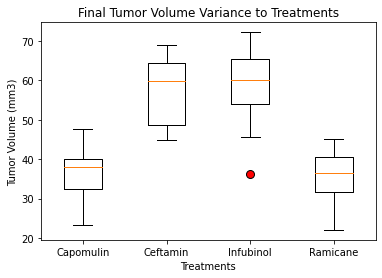

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin, Ramicane, Infubinol, and Ceftamin
boxplot_df = stat_df[['Drug Regimen', 'Tumor Volume (mm3)']]

fig3, ax = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='red', markersize=8)
ax.boxplot(tum_vol, labels=treatments, flierprops=flierprops)
ax.set(xlabel='Treatments', ylabel='Tumor Volume (mm3)', title='Final Tumor Volume Variance to Treatments')
plt.show()

## Line and Scatter Plots

(40.0, 47.0)

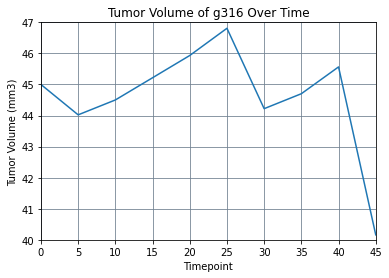

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouseID = 'g316'
mouse_df = clean_df.loc[clean_df['Mouse ID'] == mouseID, ['Timepoint', 'Tumor Volume (mm3)']]
max_x = mouse_df['Timepoint'].max()

ax = mouse_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
ax.set(title=('Tumor Volume of ' + mouseID + ' Over Time'), ylabel='Tumor Volume (mm3)')
ax.grid(axis='both', color='slategray')
ax.get_legend().remove()
plt.xlim(0, max_x)
plt.ylim(40,47)

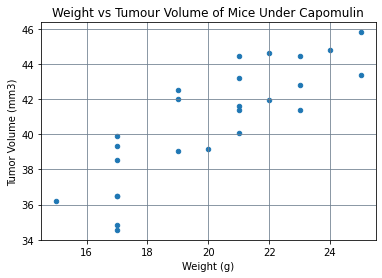

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', ['Mouse ID','Weight (g)', 'Tumor Volume (mm3)']]
weight_group_df = weight_df.groupby('Mouse ID').mean()
weight_group_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.title('Weight vs Tumour Volume of Mice Under Capomulin')
plt.grid(axis='both', color='slategray')
plt.show()
# weight_group_df

## Correlation and Regression

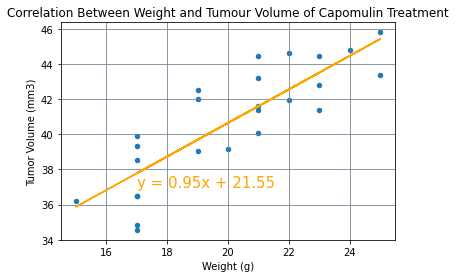

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = weight_group_df['Weight (g)']
vol = weight_group_df['Tumor Volume (mm3)']
slope, inter, r, p, std_err = sts.linregress(weight, vol)
fit = slope * weight + inter
line_eq = (f"y = {round(slope,2)}x + {round(inter,2)}")

weight_group_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.plot(weight,fit,"-", color='orange')
plt.title('Correlation Between Weight and Tumour Volume of Capomulin Treatment')
plt.grid(axis='both', color='slategray')
plt.annotate(line_eq,(17,37),fontsize=15,color="orange")
plt.show()